<a href="https://colab.research.google.com/github/gpdrishti/Software-Systems/blob/main/Copy_of_Question_1_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install data-purifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.8/121.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.7/241.7 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.3 MB/s eta 0:00:00
  Created wheel for data-purifier: filename=data_purifier-0.3.6-py3-none-any.whl size=54149 sha256=f43cce0a83164846c05c11f02e0d5a62a6fbe7818c580a49e65cce3b484bc9cb
  Stored in directory: /root/.cache/pip/wheels/6d/80/86/cb6e32868f686c85c3c4894466a269cba649e281d0b31a7451
Successfully built data-purifier
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled

In [ ]:
!python -m spacy download en_core_web_sm

2023-12-16 10:00:12.360117: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-16 10:00:12.360199: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-16 10:00:12.362434: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-16 10:00:12.376233: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-16 10:00:14.962506: W tensorflow/compiler/tf2

In [ ]:
# importing packages

import datapurifier as dp
from datapurifier import Mleda
from datapurifier import Nlpeda
from datapurifier import Nlpurifier

import seaborn as sns
import pandas as pd
import numpy as np

print(dp.__version__)

0.3.6


In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from google.colab import drive

drive.mount('/content/drive')

path_link = "/content/drive/MyDrive/train.csv"
df = pd.read_csv(path_link)

Mounted at /content/drive


(21692, 11) (20103, 11) (50839, 11) (132280, 11) (219581, 11) (185505, 11)


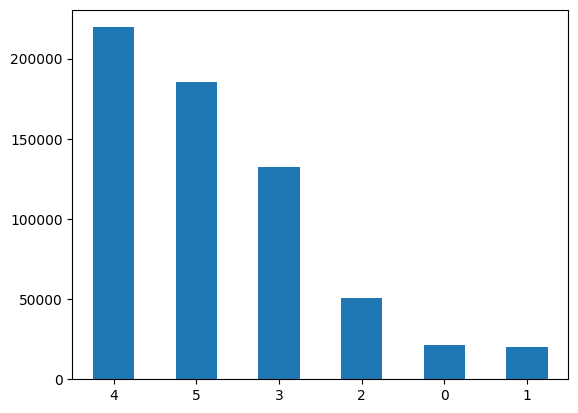

In [ ]:
count_classes=pd.value_counts(df['rating'],sort=True)
count_classes.plot(kind='bar',rot=0)
class_1=df[df['rating']==0]
class_2=df[df['rating']==1]
class_3=df[df['rating']==2]
class_4=df[df['rating']==3]
class_5=df[df['rating']==4]
class_6=df[df['rating']==5]
print(class_1.shape,class_2.shape,class_3.shape,class_4.shape,class_5.shape,class_6.shape)

In [ ]:
columns_to_drop = ['user_id', 'book_id','date_added',
       'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments']
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
pure = Nlpurifier(df, "review_text")

GridspecLayout(children=(Checkbox(value=False, description='Drop Null Rows', indent=False, layout=Layout(grid_…


Convert Word to its Base Form


interactive(children=(RadioButtons(description='Technique:', options=('None', 'Stemming', 'Lemmatization'), va…

Remove Top Common Words


interactive(children=(Checkbox(value=False, description='Remove Top Common Words'), Output()), _dom_classes=('…

Remove Top Rare Words


interactive(children=(Checkbox(value=False, description='Remove Top Rare Words'), Output()), _dom_classes=('wi…

Button(description='Start Purifying', style=ButtonStyle())

Dataframe contains 630000 rows and 3 columns

Starting execution of 'lower' function, Please wait...
Finished execution of 'lower' function in 1.097 secs

Starting execution of 'remove_numbers' function, Please wait...
Finished execution of 'remove_numbers' function in 7.801 secs

Starting execution of 'remove_html_tags' function, Please wait...
Finished execution of 'remove_html_tags' function in 45.817 secs

Starting execution of 'remove_emails' function, Please wait...
Finished execution of 'remove_emails' function in 35.117 secs

Starting execution of 'remove_urls' function, Please wait...
Finished execution of 'remove_urls' function in 9.545 secs

Starting execution of 'remove_multiple_spaces' function, Please wait...
Finished execution of 'remove_multiple_spaces' function in 12.319 secs

Starting execution of 'remove_accented_chars' function, Please wait...
Finished execution of 'remove_accented_chars' function in 5.090 secs

Starting execution of 'remove_stop_words' function, Pl

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')


# Downloading the WordNet corpus if not already downloaded
nltk.download('wordnet')
pure_df=pure.df

# Initializing the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization on a sentence
def lemmatize_sentence(sentence):
    tokens = word_tokenize(sentence)  # Tokenize the sentence into words
    lemmatized_sentence = ' '.join([lemmatizer.lemmatize(word) for word in tokens])  # Lemmatize each word
    return lemmatized_sentence

# Applying lemmatization to the 'review' column
pure_df['review_text'] = pure_df['review_text'].apply(lambda x: lemmatize_sentence(x))



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
print(pure_df)

                               review_id  \
0       55d9037adc00645b17f0cf43fa4d053e   
1       e5f389a112b12d560e42e0c5c3d4eb35   
2       e7892549ac69653aceaac86760575aa0   
3       ab4acc9ad0a24a072356c331880b83d5   
4       0b65c86a90814e4ab5db50e0cd3dc808   
...                                  ...   
629995  f71a90adff16ad1e0bddd8783775bb42   
629996  cb562651157caa44e46118930d74edf3   
629997  4b49110a886bd8f14a256bb702908578   
629998  276575dd94bc9547526829a303f56ae6   
629999  55ab6de1a263d6f33cc9e83c71f727e9   

                                              review_text  rating  
0       read audiobook book follows primarily jack pri...       3  
1       easily best sci-fi book kid didnt think suzann...       5  
2       best sarah dessen book ever say book suck knuc...       4  
3       series get better better scarlet didnt disappo...       5  
4       review hottest underhyped book ya lit enter ch...       5  
...                                                   ...     .

In [ ]:
pure_df.to_csv('train1.csv', index=False)

In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
df=pd.read_csv("/content/train1.csv")

In [ ]:
df.drop('review_id',axis=1,inplace=True)

In [ ]:
df['review_text'].fillna(method='ffill', inplace=True)

In [ ]:
missing_values = df.isnull().sum()          # show no. ōf nulls in each column
print(missing_values)

review_text    0
rating         0
dtype: int64


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = df['review_text'].tolist()
tfidf_vectorizer=TfidfVectorizer(max_features=55000)
tfidf_features=tfidf_vectorizer.fit_transform(corpus)

In [ ]:
X=tfidf_features
y=pure_df['rating']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Create a Logistic Regression model with class weights
model = LogisticRegression()

model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = model.predict(X_test)

#Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy:{accuracy}')


Accuracy:0.5250714285714285


In [ ]:
from sklearn.metrics import f1_score

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')

F1 Score: 0.5172339702417204


In [ ]:
path_link = "/content/drive/MyDrive/test.csv"
df1 = pd.read_csv(path_link)

In [ ]:
columns_to_drop = ['user_id', 'book_id','date_added',
       'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments']
df1.drop(columns=columns_to_drop, inplace=True)

In [ ]:
pure1 = Nlpurifier(df1, "review_text")

GridspecLayout(children=(Checkbox(value=False, description='Drop Null Rows', indent=False, layout=Layout(grid_…


Convert Word to its Base Form


interactive(children=(RadioButtons(description='Technique:', options=('None', 'Stemming', 'Lemmatization'), va…

Remove Top Common Words


interactive(children=(Checkbox(value=False, description='Remove Top Common Words'), Output()), _dom_classes=('…

Remove Top Rare Words


interactive(children=(Checkbox(value=False, description='Remove Top Rare Words'), Output()), _dom_classes=('wi…

Button(description='Start Purifying', style=ButtonStyle())

Dataframe contains 270000 rows and 2 columns

Starting execution of 'lower' function, Please wait...
Finished execution of 'lower' function in 0.524 secs

Starting execution of 'remove_numbers' function, Please wait...
Finished execution of 'remove_numbers' function in 3.502 secs

Starting execution of 'remove_html_tags' function, Please wait...
Finished execution of 'remove_html_tags' function in 18.846 secs

Starting execution of 'remove_emails' function, Please wait...
Finished execution of 'remove_emails' function in 14.533 secs

Starting execution of 'remove_urls' function, Please wait...
Finished execution of 'remove_urls' function in 3.103 secs

Starting execution of 'remove_multiple_spaces' function, Please wait...
Finished execution of 'remove_multiple_spaces' function in 4.281 secs

Starting execution of 'remove_accented_chars' function, Please wait...
Finished execution of 'remove_accented_chars' function in 1.324 secs

Starting execution of 'remove_stop_words' function, Ple

In [ ]:
pure_df1=pure1.df

# Initializing the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization on a sentence
def lemmatize_sentence(sentence):
    tokens = word_tokenize(sentence)  # Tokenize the sentence into words
    lemmatized_sentence = ' '.join([lemmatizer.lemmatize(word) for word in tokens])  # Lemmatize each word
    return lemmatized_sentence

# Applying lemmatization to the 'review' column
pure_df1['review_text'] = pure_df1['review_text'].apply(lambda x: lemmatize_sentence(x))



In [ ]:
pure_df1.to_csv('test1.csv', index=False)

In [ ]:
df2=pd.read_csv("/content/test1.csv")

In [ ]:
df2.drop('review_id',axis=1,inplace=True)

In [ ]:
df2['review_text'].fillna(method='ffill', inplace=True)

In [ ]:
missing_values = df2.isnull().sum()          # show no. ōf nulls in each column
print(missing_values)

review_text    0
dtype: int64


In [ ]:
corpus1 = df2['review_text'].tolist()
tfidf_vectorizer1=TfidfVectorizer(max_features=55000)
tfidf_features1=tfidf_vectorizer.transform(corpus1)

In [ ]:
X1=tfidf_features1

In [ ]:
# Create a Logistic Regression model
#model = LogisticRegression(solver="sag")

# Train the model on the training set
#model.fit(X, y)

# Make predictions on the test set
y_pred = model.predict(X1)


In [ ]:
path_link = "/content/drive/MyDrive/test.csv"
df4 = pd.read_csv(path_link)
# Assuming 'y_pred' is your predicted values for the test set

predictions_df = pd.DataFrame(y_pred, columns=['rating'])
#predictions_df.to_csv('predictions.csv', index=False)


result_df = pd.concat([ df4['review_id'],predictions_df], axis=1)
# Save the modified DataFrame back to a CSV file
result_df.to_csv('submission_1.csv',index=False)